<a href="https://colab.research.google.com/github/DianaMutekhele/Scientific-data-Analysis/blob/main/Scientific_data_analysis_in_python_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DIANA MUTEKHELE

Null hypothesis:
There is no difference in grading styles between the two professors.

Alternative hypothesis:
There is a difference in grading styles between the two professors.

# 1.Pingouin

In [ ]:
!pip install pingouin

     |████████████████████████████████| 206 kB 6.5 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
     |████████████████████████████████| 9.5 MB 10.7 MB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=d118bbede13a9069d006e3d6535b7614df7020daee1520bbc62430b977d34887
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=a328d6ea8b80ca71f3d2e8bfa07435446ecd27611279d89efd7f6e9c4b307841
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

In [ ]:
pip install dfply

     |████████████████████████████████| 612 kB 30.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import pingouin as pg

In [ ]:
#Create a folder data, where the downloaded data will reside
!mkdir data
#Upload the data into the data folder
#To view the contents of the data folder, import os and run the code below
import os
os.listdir('data')
#os.chdir('data')

mkdir: cannot create directory ‘data’: File exists


['Grade Data-Sheet1.csv']

In [ ]:
#Read the data into python environment
grade = pd.read_csv('Grade Data-Sheet1.csv')


In [ ]:
grade.head(4)

,Class,TestGrades
0,Dr. Filarnami,99
1,Dr. Filarnami,93
2,Dr. Filarnami,81
3,Dr. Filarnami,92


In [ ]:
#Look at the dimensions of the data (20 rows, and 2 columns)
grade.shape

(20, 2)

In [ ]:
grade

,Class,TestGrades
0,Dr. Filarnami,99
1,Dr. Filarnami,93
2,Dr. Filarnami,81
3,Dr. Filarnami,92
4,Dr. Filarnami,89
5,Dr. Filarnami,80
6,Dr. Filarnami,88
7,Dr. Filarnami,81
8,Dr. Filarnami,100
9,Dr. Filarnami,82


In [ ]:
grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       20 non-null     object
 1   TestGrades  20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


In [ ]:
grade['Class'].unique()

array(['Dr. Filarnami', 'Dr. Adebola'], dtype=object)

#Check for normality inorder to ascertain which test to use for common inferential scientific data analysis


#Test for Normality
There are two ways one can test for Normality
- make a histogram,Q-Q Plot and/or 
- use a statistical test(Shapiro-Wilk)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Test for normality for Dr.Filarnami
from scipy.stats import shapiro

shapiro(grade[grade.Class=='Dr. Filarnami']['TestGrades'])

ShapiroResult(statistic=0.8974428176879883, pvalue=0.205331489443779)

In [ ]:
#Test for normality for Dr. Adebola
shapiro(grade[grade.Class=='Dr. Adebola']['TestGrades'])

ShapiroResult(statistic=0.9221199154853821, pvalue=0.37497594952583313)

From the results above, we **fail to reject H0**, and therefore infer that the two sets of data are **normally distributed**

We can use **Q-Q plot** to visualize the normality of the data as below

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

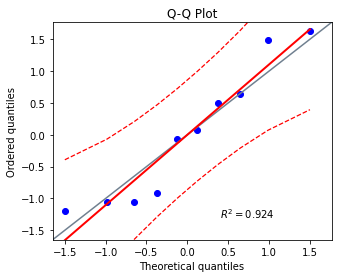

In [ ]:
#Q-Q plot for Dr. Filarnami
ap = pg.qqplot(grade[grade.Class=='Dr. Filarnami']['TestGrades'], dist='norm')

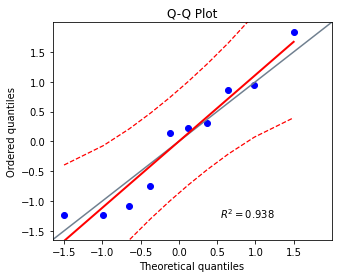

In [ ]:
#Q-Q plot for Dr. Adebola
ax = pg.qqplot(grade[grade.Class=='Dr. Adebola']['TestGrades'], dist='norm')

There are a few small deviations from the two sets of data, especially at the bottom of the plot, which is to be expected given the small data sample. We thus assume normality of the data

# Statistical Test

We will use paired t test to test for difference between the scores of the two Professors.

---
We will assume that there is no significance difference between the scores of the two teachers, H0, with the alternative hypothesis being that there is a difference between the scores

In [ ]:
pg.pairwise_ttests(dv='TestGrades', between='Class', data=grade).round(5)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Class,Dr. Adebola,Dr. Filarnami,False,True,-2.78308,18.0,two-sided,0.01227,4.474,-1.19204


The p-value is **0.01227** which less than **0.05**, We therefore reject the null hypothesis and accept the alternative hypothesis that there is a significance difference between the two groups of scores

# Visualizing the differences using seaborn package

We look at the difference between the scores of the two Professors, and indeed there is a significance difference in the grading of the two. Dr. Filarnami grades have a higher mean, with lower variance as compared to Dr. Adebola

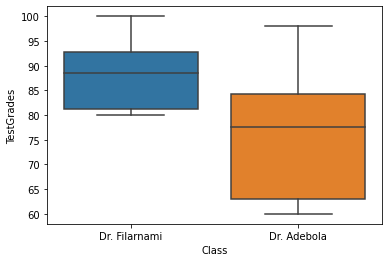

In [ ]:
import seaborn as sns
sns.boxplot(x='Class', y='TestGrades', data=grade)

In [ ]:
#Lets print the Means and standard deviations of the two score groups
mean_fila = grade[grade.Class=='Dr. Filarnami']['TestGrades'].mean()
mean_adebola = grade[grade.Class=='Dr. Adebola']['TestGrades'].mean()
sd_fila = grade[grade.Class=='Dr. Filarnami']['TestGrades'].std()
sd_adebola = grade[grade.Class=='Dr. Adebola']['TestGrades'].std()
print("Dr. Filarnami, Mean:", str(mean_fila), " Standard Deviation:", str(sd_fila), "\n","Dr. Adebola, Mean:",str(mean_adebola)," Standard Deviation:",str(sd_adebola), sep="")

Dr. Filarnami, Mean:88.5 Standard Deviation:7.472170590486631
Dr. Adebola, Mean:75.3 Standard Deviation:13.004700005083631
